In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
from datetime import datetime
from citipy import citipy

In [3]:
#import weather api key
from config import weather_api_key

In [4]:
#url for pulling in weather api
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
#create a set of random latitude and longitude combos

lats = np.random.uniform(low =-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [6]:
#boston = "Boston"


#city_url = url + "&q=" + boston

#city_weather = requests.get(city_url)
#city_weather.json()

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
#create list for holding the cities

cities = []

#identify the nearest city for each lat and long combo

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

606

In [9]:
#create an empy list to hold the weather data

city_data = []

#print the beginning of the logging 
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through the cities in our list

for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record , and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}| {city}")
    
    #add 1 to the record count
    record_count+= 1
    
#run an API request for each city
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #parse out the data needed
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #append the city info to the city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    #if an error is experienced, skip the city
    except:
        print(f"City not found. Skipping..")
        pass
              
 # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| cayenne
Processing Record 2 of Set 1| sao filipe
Processing Record 3 of Set 1| bluff
Processing Record 4 of Set 1| rikitea
Processing Record 5 of Set 1| albany
Processing Record 6 of Set 1| iroquois falls
Processing Record 7 of Set 1| torbay
Processing Record 8 of Set 1| harper
Processing Record 9 of Set 1| sangar
Processing Record 10 of Set 1| buraydah
Processing Record 11 of Set 1| dikson
Processing Record 12 of Set 1| da lat
Processing Record 13 of Set 1| pevek
Processing Record 14 of Set 1| north bend
Processing Record 15 of Set 1| tuktoyaktuk
Processing Record 16 of Set 1| kabo
Processing Record 17 of Set 1| castro
Processing Record 18 of Set 1| voh
Processing Record 19 of Set 1| tiksi
Processing Record 20 of Set 1| skalistyy
City not found. Skipping..
Processing Record 21 of Set 1| busselton
Processing Record 22 of Set 1| atuona
Processing Record 23 of Set 1| aasiaat
Processing Record 24 of 

Processing Record 42 of Set 4| mackay
Processing Record 43 of Set 4| port hardy
Processing Record 44 of Set 4| avera
Processing Record 45 of Set 4| salinopolis
Processing Record 46 of Set 4| yeletskiy
City not found. Skipping..
Processing Record 47 of Set 4| sal rei
Processing Record 48 of Set 4| thamaga
Processing Record 49 of Set 4| mehamn
Processing Record 50 of Set 4| suntar
Processing Record 1 of Set 5| khatanga
Processing Record 2 of Set 5| launceston
Processing Record 3 of Set 5| whitehorse
Processing Record 4 of Set 5| muli
Processing Record 5 of Set 5| lompoc
Processing Record 6 of Set 5| cidreira
Processing Record 7 of Set 5| kodiak
Processing Record 8 of Set 5| senmonorom
City not found. Skipping..
Processing Record 9 of Set 5| kibre mengist
Processing Record 10 of Set 5| powell river
Processing Record 11 of Set 5| acari
Processing Record 12 of Set 5| zhob
Processing Record 13 of Set 5| mineros
Processing Record 14 of Set 5| davila
Processing Record 15 of Set 5| aklavik
Proc

Processing Record 37 of Set 8| belmonte
Processing Record 38 of Set 8| charters towers
Processing Record 39 of Set 8| bhimunipatnam
Processing Record 40 of Set 8| port blair
Processing Record 41 of Set 8| dongsheng
Processing Record 42 of Set 8| altamira
Processing Record 43 of Set 8| kruisfontein
Processing Record 44 of Set 8| karauzyak
City not found. Skipping..
Processing Record 45 of Set 8| medea
Processing Record 46 of Set 8| labutta
City not found. Skipping..
Processing Record 47 of Set 8| punta alta
Processing Record 48 of Set 8| fairbanks
Processing Record 49 of Set 8| berlevag
Processing Record 50 of Set 8| koundara
Processing Record 1 of Set 9| prince rupert
Processing Record 2 of Set 9| madison
Processing Record 3 of Set 9| bundaberg
Processing Record 4 of Set 9| tura
Processing Record 5 of Set 9| kantemirovka
Processing Record 6 of Set 9| chengmai
City not found. Skipping..
Processing Record 7 of Set 9| carnot
Processing Record 8 of Set 9| bartica
Processing Record 9 of Set

Processing Record 24 of Set 12| asfi
Processing Record 25 of Set 12| xalpatlahuac
Processing Record 26 of Set 12| lasa
Processing Record 27 of Set 12| vulcan
Processing Record 28 of Set 12| iqaluit
Processing Record 29 of Set 12| labuhan
Processing Record 30 of Set 12| magaria
Processing Record 31 of Set 12| biryusinsk
Processing Record 32 of Set 12| camocim
Processing Record 33 of Set 12| san policarpo
Processing Record 34 of Set 12| padang
Processing Record 35 of Set 12| port hedland
Processing Record 36 of Set 12| butzbach
Processing Record 37 of Set 12| ivybridge
Processing Record 38 of Set 12| portoferraio
Processing Record 39 of Set 12| pokrovsk
Processing Record 40 of Set 12| orguz
Processing Record 41 of Set 12| rafsanjan
Processing Record 42 of Set 12| antalaha
Processing Record 43 of Set 12| wulanhaote
City not found. Skipping..
Processing Record 44 of Set 12| cam ranh
Processing Record 45 of Set 12| umzimvubu
City not found. Skipping..
Processing Record 46 of Set 12| filadel

In [10]:
#convert the array of dictionaries to a pandas dataframe

city_data_df = pd.DataFrame(city_data)

#reordering columns
new_column_order = ["City","Country","Date","Lat","Lng",
                    "Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cayenne,GF,2022-04-24 14:45:38,4.9333,-52.3333,86.04,9,100,8.05
1,Sao Filipe,CV,2022-04-24 14:45:39,14.8961,-24.4956,75.99,69,4,4.36
2,Bluff,NZ,2022-04-24 14:45:39,-46.6000,168.3333,52.81,83,91,19.08
3,Rikitea,PF,2022-04-24 14:45:39,-23.1203,-134.9692,73.99,79,100,6.49
4,Albany,US,2022-04-24 14:45:40,42.6001,-73.9662,57.63,43,93,4.00
5,Iroquois Falls,CA,2022-04-24 14:45:40,48.7669,-80.6831,44.64,88,100,14.65
6,Torbay,CA,2022-04-24 14:45:40,47.6666,-52.7314,37.27,96,100,21.85
7,Harper,LR,2022-04-24 14:45:41,4.3750,-7.7169,86.32,67,98,10.51
8,Sangar,RU,2022-04-24 14:45:41,63.9242,127.4739,5.83,98,56,2.33
9,Buraydah,SA,2022-04-24 14:45:41,26.3260,43.9750,84.40,27,95,7.16


In [11]:
#create the output file (csv)

output_data_file = "weather_data/cities.csv"

#export the city_data into a csv

city_data_df.to_csv(output_data_file,index_label="City_ID")

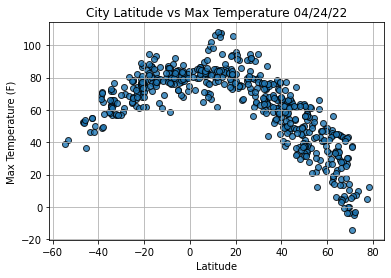

In [12]:
#extract relevent fields from the DataFrame for plotting

lats = city_data_df["Lat"]
lngs = city_data_df["Lng"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


import time

#get today's date in seconds

today = time.strftime("%x")

#build scatter plot for lat vs max temp

plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths=1,marker="o",
           alpha=0.8, label = "Cities",)

#addint other graph properties

plt.title(f"City Latitude vs Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.grid(True)

#save dat shit

plt.savefig("weather_data/Fig1.png")

#show dat shit
plt.show()

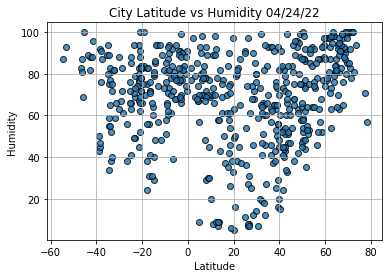

In [13]:
#build scatter plot for lat vs humidity

plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths=1,marker="o",
           alpha=0.8, label = "Cities",)

#addint other graph properties

plt.title(f"City Latitude vs Humidity " + today)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.grid(True)

#save dat shit

plt.savefig("weather_data/Fig2.png")

#show dat shit
plt.show()

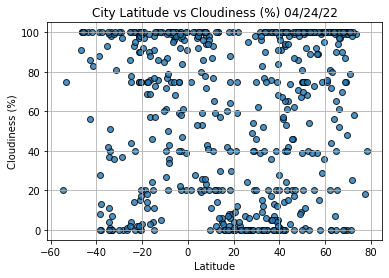

In [14]:
#build scatter plot for lat vs cloudiness

plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths=1,marker="o",
           alpha=0.8, label = "Cities",)

#addint other graph properties

plt.title(f"City Latitude vs Cloudiness (%) " + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.grid(True)

#save dat shit

plt.savefig("weather_data/Fig3.png")

#show dat shit
plt.show()

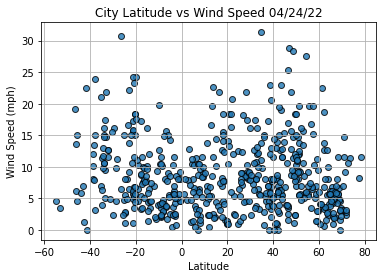

In [15]:
#build scatter plot for lat vs wind speed

plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths=1,marker="o",
           alpha=0.8, label = "Cities",)

#addint other graph properties

plt.title(f"City Latitude vs Wind Speed " + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.grid(True)

#save dat shit

plt.savefig("weather_data/Fig4.png")

#show dat shit
plt.show()

In [19]:
#import lin regress fro mthe module
from scipy.stats import linregress

In [21]:
#create a function to create perform linear regression on the weather data
# and plot regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
  # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
#index13 = city_data_df.loc[13]
#index13

# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

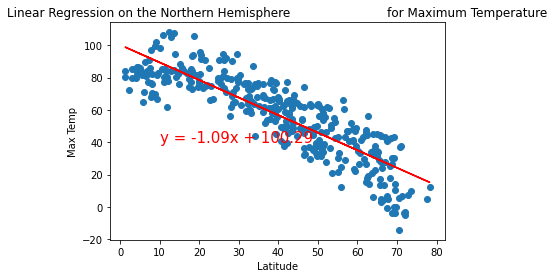

In [31]:
# linear regression on the northern hemi

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function

plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

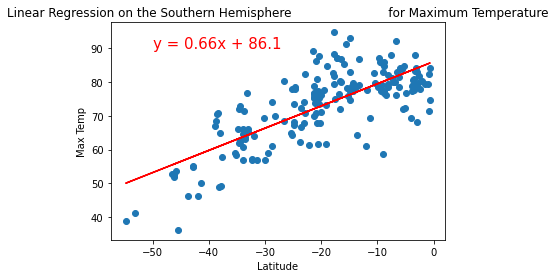

In [33]:
# linear regression on the southern hemi

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function

plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

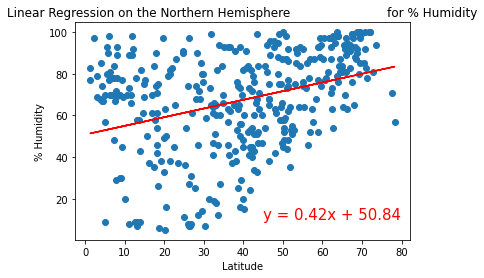

In [36]:
# linear regression on the northern hemi % humidity

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#call the function

plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

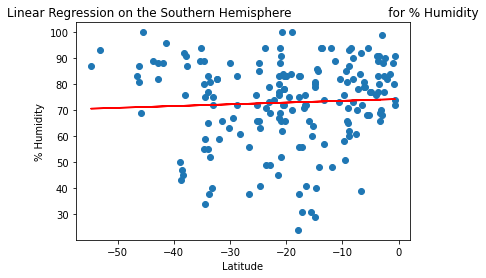

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

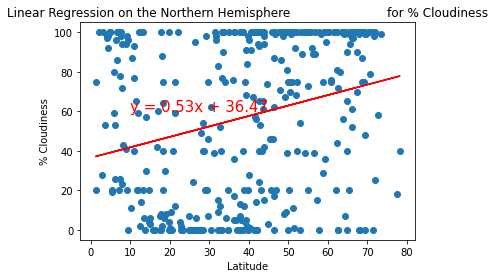

In [39]:
# linear regression on the northern hemi % cloudiness

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#call the function

plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

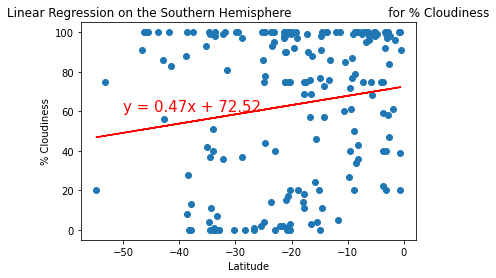

In [41]:
# linear regression on the southern hemi % cloudiness

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#call the function

plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

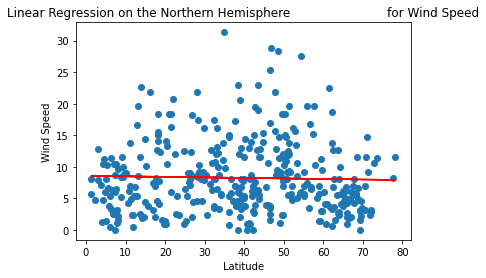

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

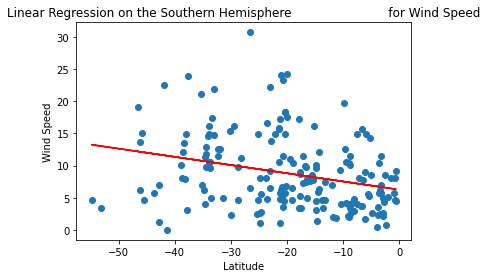

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))